<a href="https://colab.research.google.com/github/CalvHobbes/fastai/blob/master/My_Fast_AI_Lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install -Uqq fastai duckduckgo_search
!pip install fastgradio



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.8/306.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        # generator which yields dicts with:
        # {'title','image','thumbnail','url','height','width','source'}
        search_results = ddgs.images(keywords=term)
        # grap number of max_images urls
        image_urls = [next(search_results).get("image") for _ in range(max_images)]
        # convert to L (functionally extended list class from fastai)
        return L(image_urls)



In [ ]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


'https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=green-bird-1661179.jpg&fm=jpg'

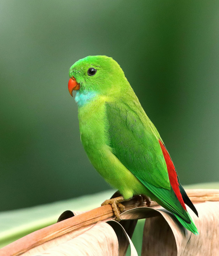

In [ ]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest photos'


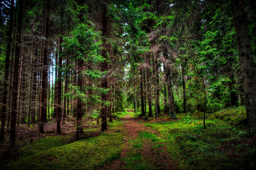

In [ ]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [ ]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

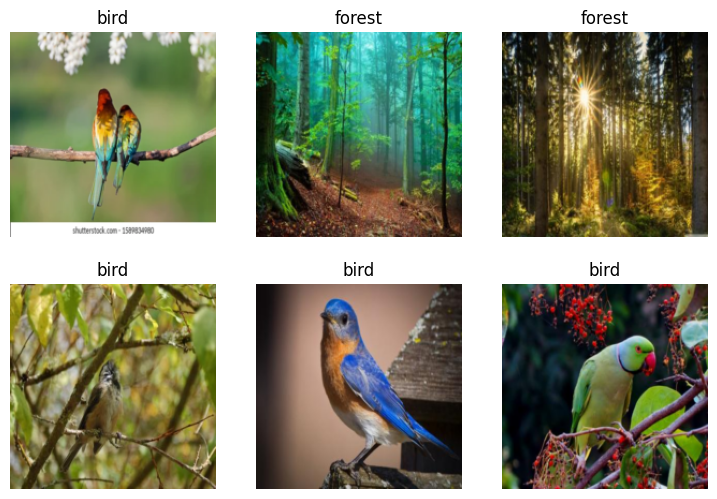

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 117MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.582707,0.376223,0.121212,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.144221,0.083885,0.060606,00:25
1,0.075417,0.016576,0.000000,00:26
2,0.061160,0.016278,0.000000,00:26


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9998


In [ ]:
mountains = 'Mount Everest', 'K2', 'Kanchenjunga', 'Lhotse', 'Makalu', 'Cho Oyu', 'Dhaulagiri I', 'Manaslu I', 'Nanga Parbat', 'Annapurna I', 'Gasherbrum I', 'Broad Peak', 'Gasherbrum II', 'Shishapangma'

for mt in mountains:
    urls = search_images(f'{mt} photos', max_images=1)
    dest = f'{mt}.jpg'
    download_url(urls[0], dest, show_progress=False)


Searching for 'Mount Everest photos'
Searching for 'K2 photos'
Searching for 'Kanchenjunga photos'
Searching for 'Lhotse photos'
Searching for 'Makalu photos'
Searching for 'Cho Oyu photos'
Searching for 'Dhaulagiri I photos'
Searching for 'Manaslu I photos'
Searching for 'Nanga Parbat photos'
Searching for 'Annapurna I photos'
Searching for 'Gasherbrum I photos'
Searching for 'Broad Peak photos'
Searching for 'Gasherbrum II photos'
Searching for 'Shishapangma photos'


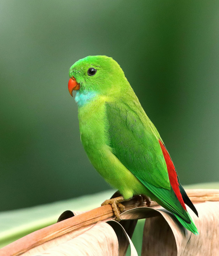

In [ ]:
from fastai.vision.all import *
Image.open('Broad Peak.jpg')
im.to_thumb(256,256)


In [ ]:
path = Path('peaks')
from time import sleep

for o in mountains:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo',max_images=30))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo',max_images=30))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo',max_images=30))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)
path = Path('peaks')
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

Searching for 'Mount Everest photo'
Searching for 'Mount Everest sun photo'
Searching for 'Mount Everest shade photo'
Searching for 'K2 photo'
Searching for 'K2 sun photo'
Searching for 'K2 shade photo'
Searching for 'Kanchenjunga photo'
Searching for 'Kanchenjunga sun photo'
Searching for 'Kanchenjunga shade photo'
Searching for 'Lhotse photo'
Searching for 'Lhotse sun photo'
Searching for 'Lhotse shade photo'
Searching for 'Makalu photo'
Searching for 'Makalu sun photo'
Searching for 'Makalu shade photo'
Searching for 'Cho Oyu photo'
Searching for 'Cho Oyu sun photo'
Searching for 'Cho Oyu shade photo'
Searching for 'Dhaulagiri I photo'
Searching for 'Dhaulagiri I sun photo'
Searching for 'Dhaulagiri I shade photo'
Searching for 'Manaslu I photo'
Searching for 'Manaslu I sun photo'
Searching for 'Manaslu I shade photo'
Searching for 'Nanga Parbat photo'
Searching for 'Nanga Parbat sun photo'
Searching for 'Nanga Parbat shade photo'
Searching for 'Annapurna I photo'
Searching for 'Ann

20

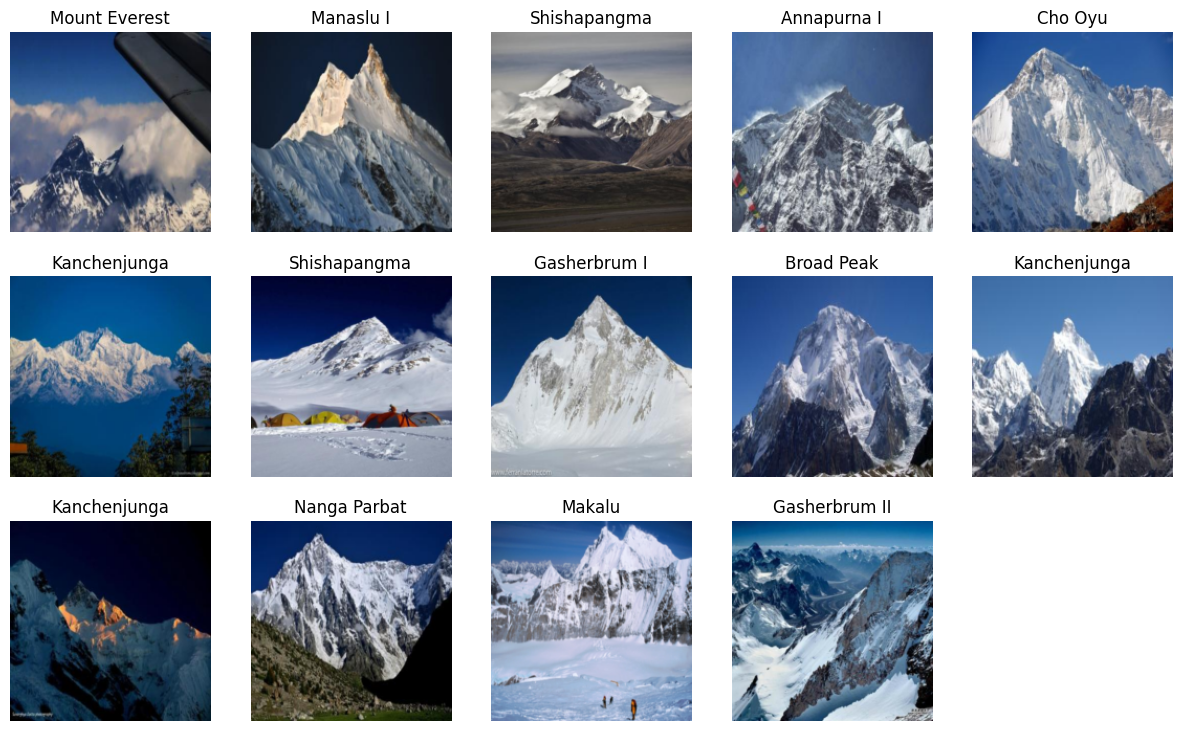

In [ ]:
from fastai.vision.all import *
path = Path('peaks')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=14)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 163MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,3.657595,1.986142,0.528037,01:28


epoch,train_loss,valid_loss,error_rate,time
0,1.983378,1.678213,0.471963,02:13
1,1.349477,1.514957,0.397196,02:11
2,0.882534,1.488685,0.378505,02:11


In [ ]:
learn.export('topmountainsmodel.pkl')

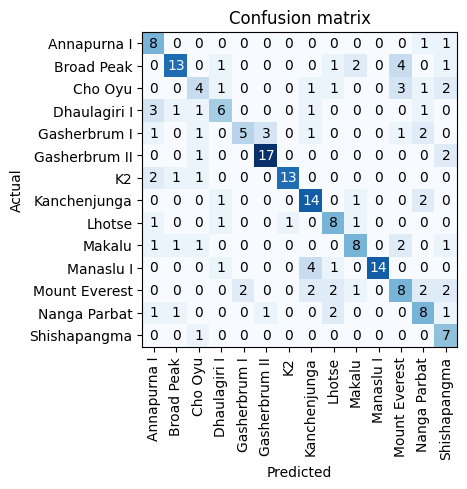

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
for mt in mountains:
    src = f'{mt}.jpg'
    print(f'checking image {src}')
    mt_type,_,probs = learn.predict(PILImage.create(src))
    print(f"This is a: {mt_type}.")
    print(f"Probability it's a {mt_type}: {probs[0]:.4f}")

checking image Mount Everest.jpg


This is a: Mount Everest.
Probability it's a Mount Everest: 0.0002
checking image K2.jpg


This is a: Cho Oyu.
Probability it's a Cho Oyu: 0.0007
checking image Kanchenjunga.jpg


This is a: Shishapangma.
Probability it's a Shishapangma: 0.0044
checking image Lhotse.jpg


This is a: Lhotse.
Probability it's a Lhotse: 0.0198
checking image Makalu.jpg


This is a: Makalu.
Probability it's a Makalu: 0.0099
checking image Cho Oyu.jpg


This is a: Cho Oyu.
Probability it's a Cho Oyu: 0.0007
checking image Dhaulagiri I.jpg


This is a: Cho Oyu.
Probability it's a Cho Oyu: 0.0407
checking image Manaslu I.jpg


This is a: Manaslu I.
Probability it's a Manaslu I: 0.0032
checking image Nanga Parbat.jpg


This is a: Nanga Parbat.
Probability it's a Nanga Parbat: 0.0005
checking image Annapurna I.jpg


This is a: Annapurna I.
Probability it's a Annapurna I: 0.9957
checking image Gasherbrum I.jpg


This is a: Gasherbrum I.
Probability it's a Gasherbrum I: 0.0000
checking image Broad Peak.jpg


This is a: Broad Peak.
Probability it's a Broad Peak: 0.0000
checking image Gasherbrum II.jpg


This is a: Gasherbrum II.
Probability it's a Gasherbrum II: 0.0001
checking image Shishapangma.jpg


This is a: Shishapangma.
Probability it's a Shishapangma: 0.0000


In [ ]:
url = 'https://www.karakorumexpedition.com/wp-content/uploads/Gashbrum-I-800x375.jpg'
src = 'my gash1.jpg'
download_url(url, src, show_progress=False)


Path('my gash1.jpg')

In [ ]:

mt_type,_,probs = learn.predict(PILImage.create(src))
print(f'{mt_type}: prob: {probs[0]:.4f}')

Gasherbrum II: prob: 0.0004


In [ ]:
from ipywidgets import FileUpload

# Create an upload button
upload = FileUpload()
display(upload)  # This will display the upload button in your Jupyter notebook



FileUpload(value={}, description='Upload')

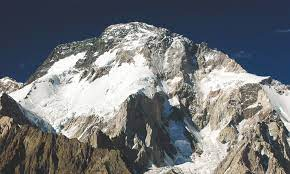

In [ ]:
# After you've uploaded an image, you can access the image data like this:
from PIL import Image
from io import BytesIO
if upload.data:
    image = Image.open(BytesIO(upload.data[0]))
    display(image)



In [ ]:
mt_type,_,probs = learn.predict(image)
print(f'{mt_type}: prob: {probs[0]:.4f}')

NameError: name 'learn' is not defined